# **CS713 Project : Analyzing and Forecasting Zomato Stock Prices**
##### **Introduction**

- Zomato, founded in 2008 by Deepinder Goyal and Pankaj Chaddah, is a prominent Indian multinational corporation specializing in restaurant aggregation and food delivery services. By 2022–23, Zomato had expanded its operations to over 1,000 cities across India, offering comprehensive restaurant information, menus, user reviews, and food delivery from partner establishments. In July 2021, Zomato's Initial Public Offering (IPO) saw its shares priced at INR 115 on the Bombay Stock Exchange (BSE) and INR 116 on the National Stock Exchange (NSE) of India, attracting significant investor interest because of its promising returns and inherent market volatility.
- This project focuses on a comprehensive analysis of Zomato's stock price data from July 2021 to February 2024, sourced from Kaggle. The key objectives are to detect anomalies and develop predictive models using the AutoRegressive Integrated Moving Average (ARIMA) methodology. The analysis will proceed in stages: Exploratory Data Analysis (EDA), anomaly detection, and time series forecasting.

##### **Problem Statement**
- Despite Zomato's rapid expansion and significant market presence in the food delivery industry, its stock price has exhibited notable volatility since its Initial Public Offering (IPO) in July 2021. The fluctuating stock prices pose a challenge for investors seeking to make informed decisions.
- Currently, there is a lack of comprehensive analysis of Zomato’s stock performance that addresses the detection of price anomalies and the forecasting of future trends. Without accurate predictive models and a thorough understanding of the factors influencing stock price movements, investors may struggle to identify optimal investment opportunities and mitigate potential risks.
- This project aims to fill this gap by conducting an in-depth analysis of Zomato’s stock price data, covering the period from July 2021 to February 2024. The analysis will utilize advanced techniques such as Exploratory Data Analysis (EDA), anomaly detection, and time series forecasting with ARIMA models. The goal is to provide actionable insights that will help investors make better-informed decisions, reduce the risk of losses, and enhance their investment strategies in a volatile market environment.



###### **Steps-to-follow**
1. Data Collection and Loading - (Source Kaggle)
2. Exploratory Data Analysis (EDA)
3. Anomaly Detection
4. Time Series Modelling and Forcasting (ARIMA)
5. Result Visualization


### **Data Collection and Loading**

- The first cell will contain all the libraries needed to be used in the project.
- the next cell will contain the source to be loaded.

In [1]:
!pip install scikit-learn
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import mplfinance as mpf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
#Loading csv in Dataframe
zomato_df = pd.read_csv('zomato.csv')

### **Exploratory Data Analysis (EDA)**

**Steps**
1. Data Inspection, Understanding and Cleaning.
2. Calculating Descriptive statistics
3. Plotting Column distributions
4. Plotting Scatter plot of `[Open vs Close , Price Change(i.e. |Close - Open|) vs Volume, Date vs Close, Date vs Open]`
 `Close - Open` vs `High - Low` **AND** `Close - High` vs `Open - Low` to identify trends.


#### **Data Inspection, Understanding and Cleaning**


- To get an idea of how the data looks like we will print first and last 20 rows of data.

- Here, one can observe that the `Adj Close` column is mostly Similar to `Close` column hence we can drop that column.

- Moreover the data where `Volume` is 0 and all columns (`High`, `Low`, `Open`, `Close`) value is same, is considered a Market Holiday.

In [4]:
# First 20 rows
print(zomato_df.head(20))

# Last 20 Rows
print(zomato_df.tail(20))

          Date        Open        High         Low       Close   Adj Close  \
0   2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
1   2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2   2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
3   2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
4   2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   
5   2021-07-30  142.600006  142.699997  131.000000  133.500000  133.500000   
6   2021-08-02  135.750000  140.750000  135.149994  139.699997  139.699997   
7   2021-08-03  137.000000  140.800003  137.000000  139.399994  139.399994   
8   2021-08-04  139.800003  141.000000  135.250000  138.399994  138.399994   
9   2021-08-05  138.750000  138.899994  132.000000  134.949997  134.949997   
10  2021-08-06  135.500000  136.199997  130.100006  131.350006  131.350006   
11  2021-08-09  132.399994  133.550003  127.250000  130.600006  

In [4]:
zomato_df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
621,2024-01-24,131.449997,136.899994,129.800003,136.199997,136.199997,54612769
622,2024-01-25,135.899994,138.199997,132.800003,136.149994,136.149994,60682540
623,2024-01-29,136.899994,137.699997,132.350006,135.550003,135.550003,55871017
624,2024-01-30,135.850006,138.800003,134.649994,137.199997,137.199997,57612020
625,2024-01-31,140.000000,142.000000,138.000000,139.550003,139.550003,89833027
626,2024-02-01,141.000000,143.500000,138.550003,140.550003,140.550003,70252449
627,2024-02-02,141.800003,145.000000,141.449997,143.800003,143.800003,78666454
628,2024-02-05,145.000000,145.399994,138.250000,140.250000,140.250000,54189688
629,2024-02-06,140.399994,141.800003,138.050003,139.949997,139.949997,46782951
630,2024-02-07,141.000000,142.899994,139.649994,140.399994,140.399994,75083259


In [4]:
# Dropping Adj Close column
zomato_df.drop(['Adj Close'], axis=1, inplace=True)

**General Dataset Information**
- Shows the data type, Column Names and other General information about the dataframe (dataset).

- Also checking if there is any null content in the dataset.

In [6]:
print(zomato_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    631 non-null    object 
 1   Open    631 non-null    float64
 2   High    631 non-null    float64
 3   Low     631 non-null    float64
 4   Close   631 non-null    float64
 5   Volume  631 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 29.7+ KB
None


As the sum is 0 for every column. this means there is no null column.

In [7]:
# checking Null content in dataset ()
print(zomato_df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


#### **Descriptive Statistics**

**Summary Statistics**
- This shows the Descriptive statistics for every column in the dataset.
- Here, one can see the statistics for Volume is messed up. Just to be safe and verify other summary stats we will maually calculate them for all columns.

In [8]:
# Summary Statistics
print(zomato_df.describe())

             Open        High         Low       Close        Volume
count  631.000000  631.000000  631.000000  631.000000  6.310000e+02
mean    90.011252   91.835737   87.868304   89.707686  6.731737e+07
std     32.757639   33.319545   31.900849   32.621900  7.461030e+07
min     40.849998   44.400002   40.599998   41.650002  0.000000e+00
25%     62.549999   63.450001   61.125000   62.074998  2.800788e+07
50%     80.000000   81.000000   78.099998   79.699997  4.759710e+07
75%    124.474998  126.750000  121.525002  124.599998  7.525439e+07
max    161.149994  169.000000  154.250000  160.300003  6.948953e+08


In [33]:
print("Summary Statistics: ")
print(f"Open count: {zomato_df['Open'].count()}")
print(f"Open mean: {zomato_df['Open'].mean()}")
print(f"Open maximun: {zomato_df['Open'].max()}")
print(f"Open minumum: {zomato_df['Open'].min()}")
print()
print(f"Close count: {zomato_df['Close'].count()}")
print(f"Close mean: {zomato_df['Close'].mean()}")
print(f"Close maximun: {zomato_df['Close'].max()}")
print(f"Close minumum: {zomato_df['Close'].min()}")
print()
print(f"High count: {zomato_df['High'].count()}")
print(f"High mean: {zomato_df['High'].mean()}")
print(f"High maximun: {zomato_df['High'].max()}")
print(f"High minumum: {zomato_df['High'].min()}")
print()
print(f"Low count: {zomato_df['Low'].count()}")
print(f"Low mean: {zomato_df['Low'].mean()}")
print(f"Low maximun: {zomato_df['Low'].max()}")
print(f"Low minumum: {zomato_df['Low'].min()}")
print()
print(f"Volume count: {zomato_df['Volume'].count()}")
print(f"Volume mean: {zomato_df['Volume'].mean()}")
print(f"Volume maximun: {zomato_df['Volume'].max()}")
print(f"Volume minumum: {zomato_df['Volume'].min()}")
print(f"Total Volume: {sum(zomato_df['Volume'])}")

Summary Statistics: 
Open count: 631
Open mean: 90.01125203803487
Open maximun: 161.149994
Open minumum: 40.849998

Close count: 631
Close mean: 89.70768627099841
Close maximun: 160.300003
Close minumum: 41.650002

High count: 631
High mean: 91.83573672107765
High maximun: 169.0
High minumum: 44.400002

Low count: 631
Low mean: 87.86830447226625
Low maximun: 154.25
Low minumum: 40.599998

Volume count: 631
Volume mean: 67317368.60697305
Volume maximun: 694895290
Volume minumum: 0
Total Volume: 42477259591


#### **Plotting Column distributions**


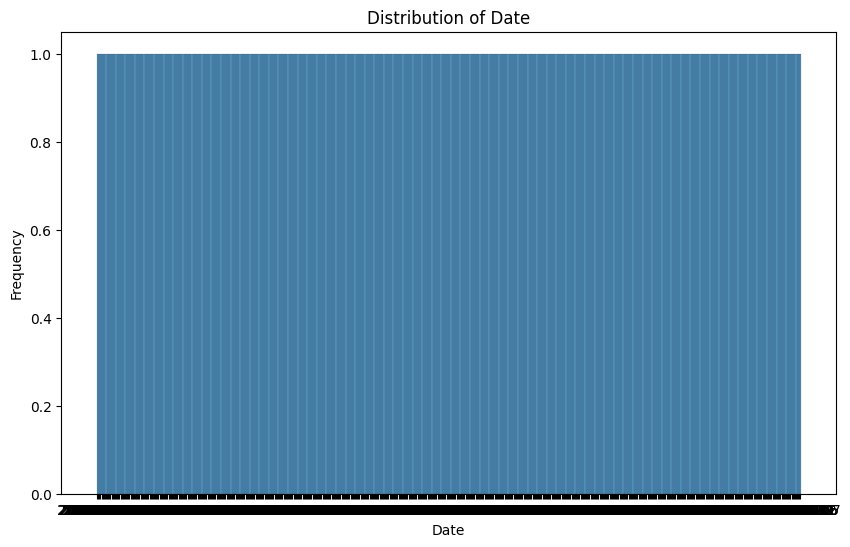

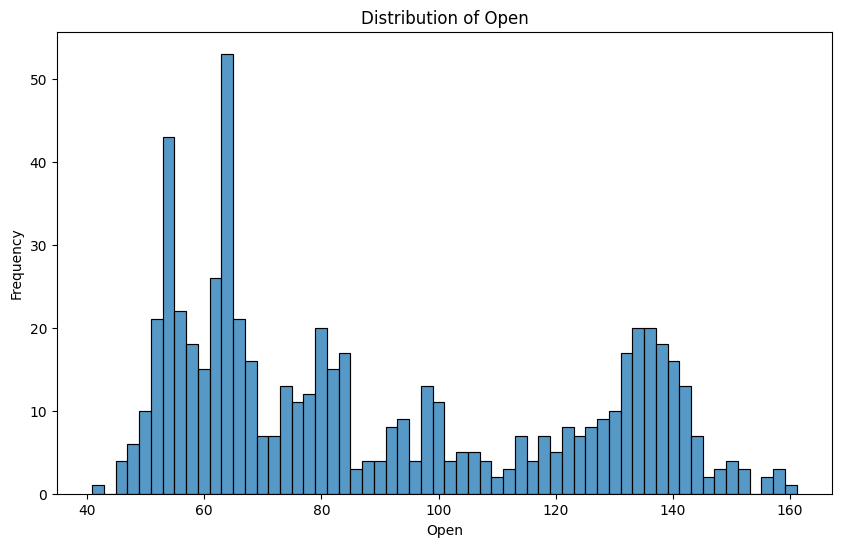

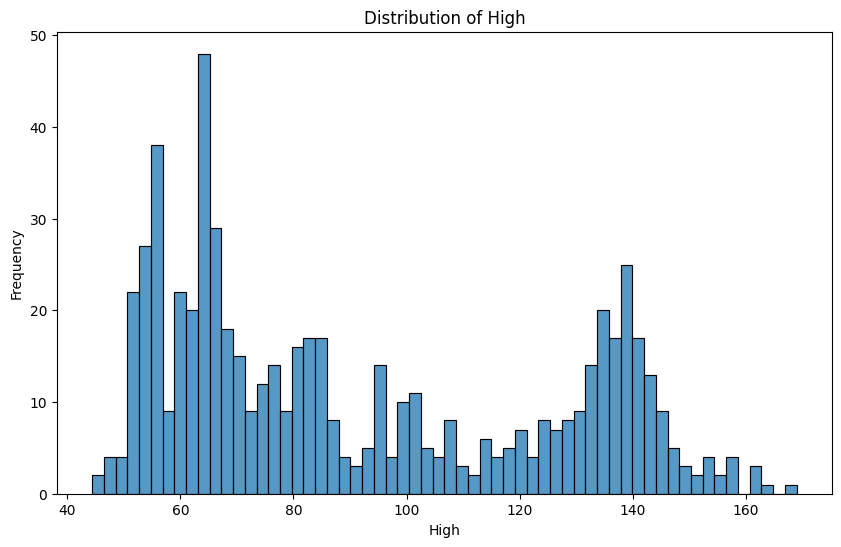

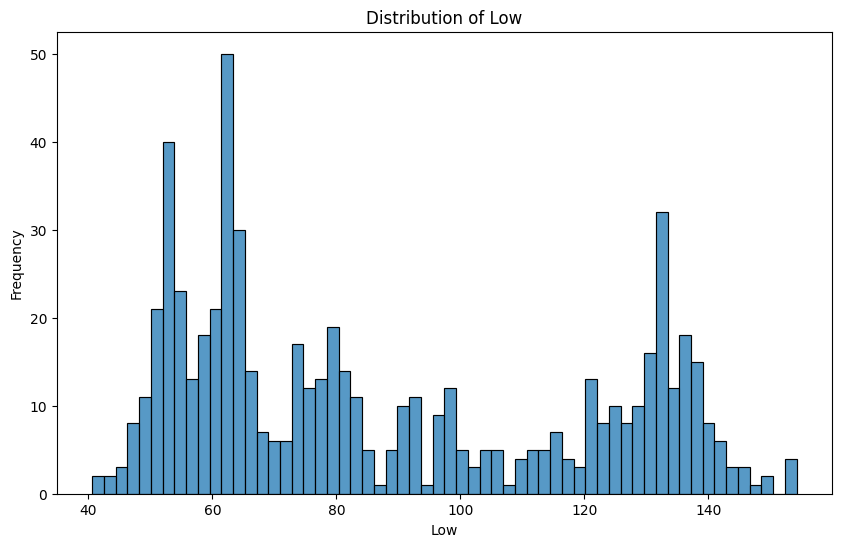

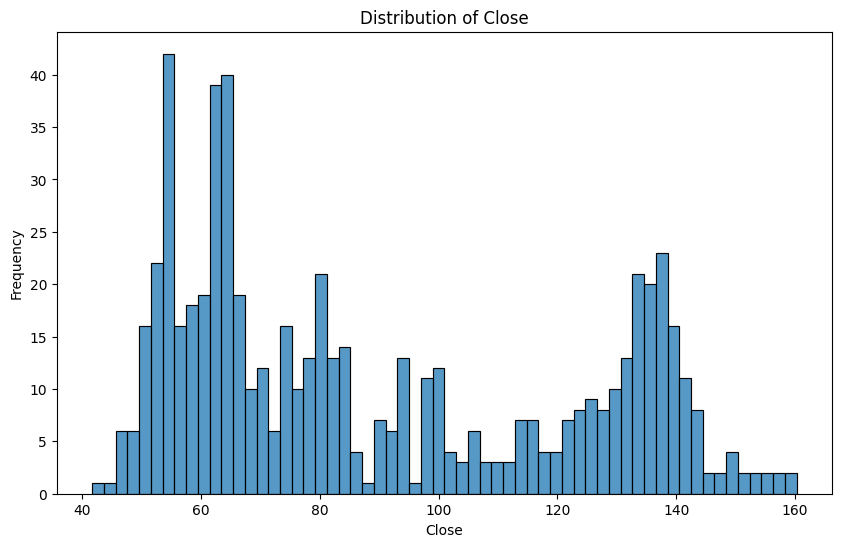

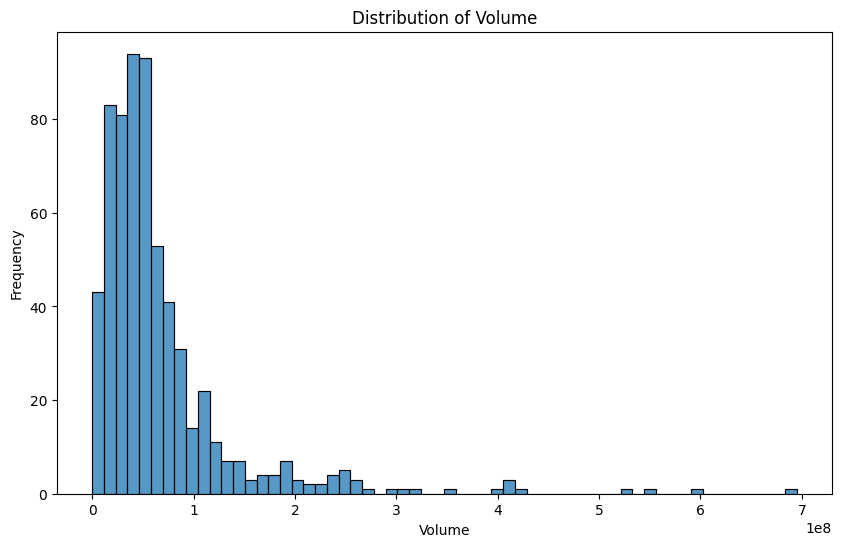

In [10]:
for column in zomato_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(zomato_df[column], bins=60)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### **Plotting Scatter Plot to identify relationship**


- **Plot for Opening vs Closing Price:** shows positive trend. showing the stock is profitable and is growing.

- **Plot for Price Change vs Volume:** shows no particular relationship between them.

- **Plot for Date vs Closing & Date vs Opening:** these two show similar structure as they show the fall and the rise of the stock price.

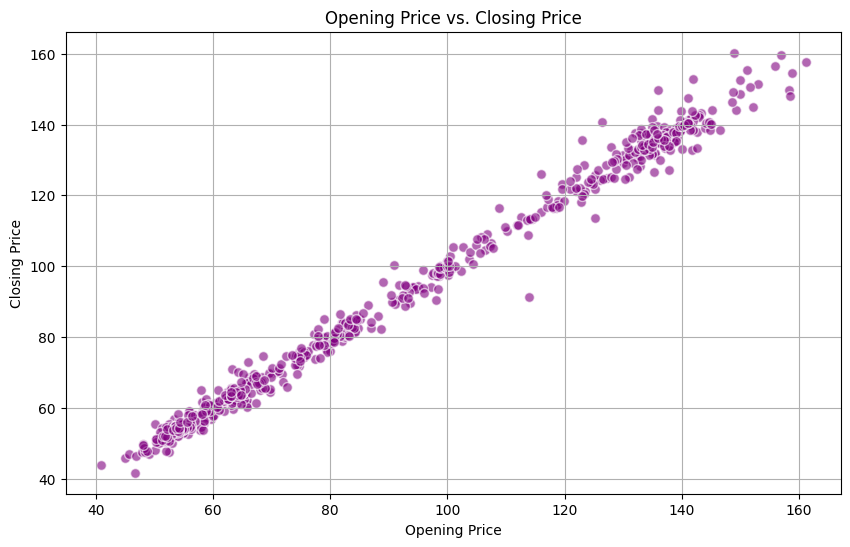

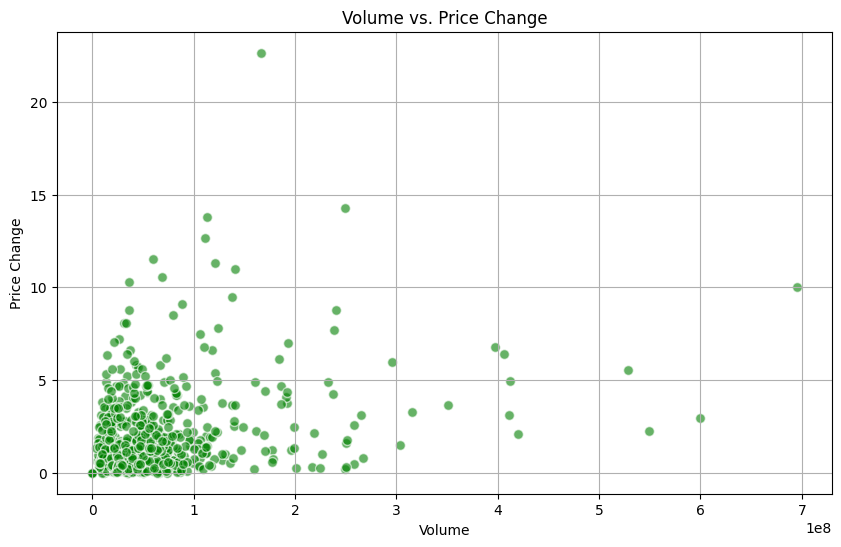

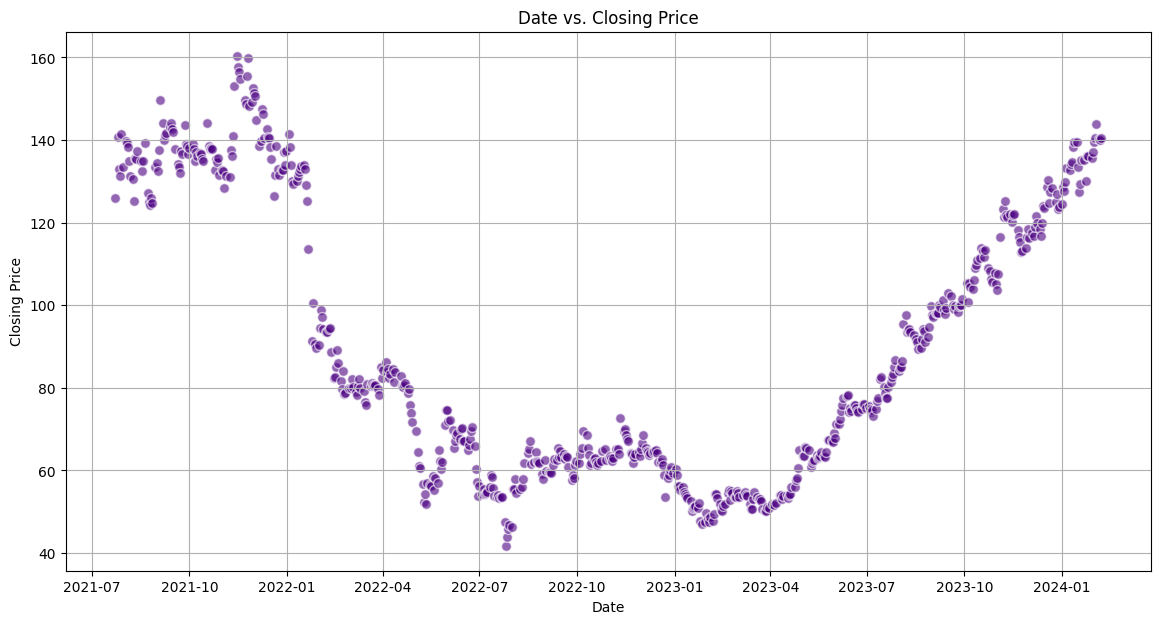

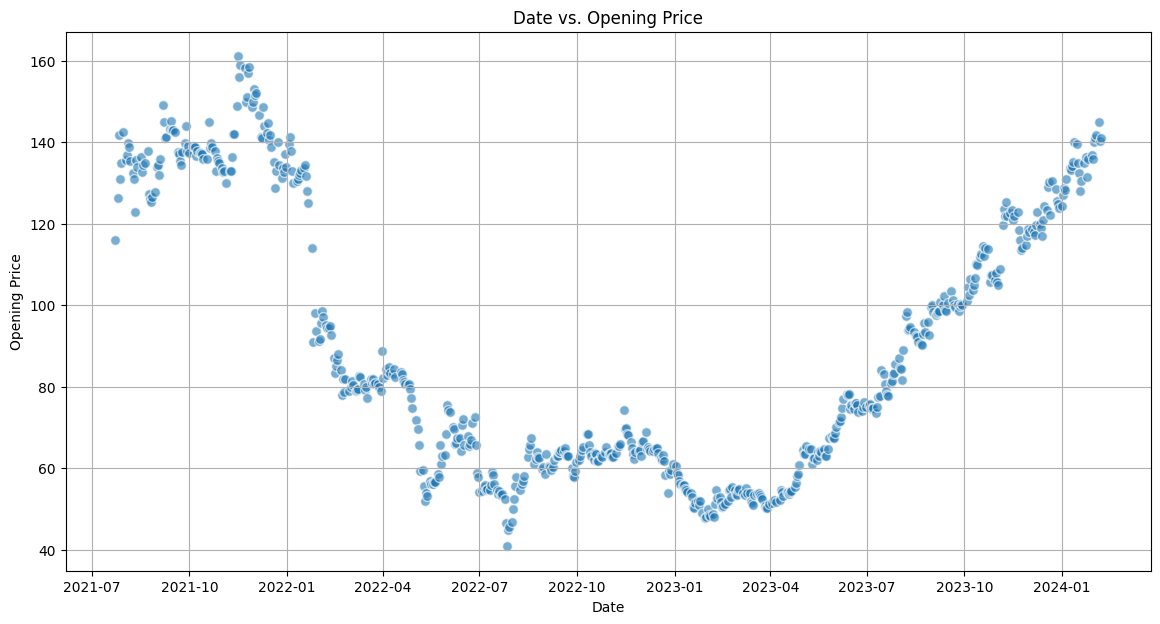

In [11]:
# Scatter Plot for Opening vs Closing Price
plt.figure(figsize=(10, 6))
plt.scatter(zomato_df['Open'], zomato_df['Close'], alpha=0.6, edgecolors='w', s=50, color= "purple")
plt.title('Opening Price vs. Closing Price')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Scatter plot for Volume vs. Price Change
zomato_df['Price_Change'] = abs(zomato_df['Close'] - zomato_df['Open'])
plt.figure(figsize=(10, 6))
plt.scatter(zomato_df['Volume'], zomato_df['Price_Change'], alpha=0.6, edgecolors='w', s=50, color='green')
plt.title('Volume vs. Price Change')
plt.xlabel('Volume')
plt.ylabel('Price Change')
plt.grid(True)
plt.show()

# Scatter plot for Date vs. Closing Price
plt.figure(figsize=(14, 7))
plt.scatter(pd.to_datetime(zomato_df['Date']), zomato_df['Close'], alpha=0.6, edgecolors='w', s=50, color = "indigo")
plt.title('Date vs. Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Scatter plot for Date vs. Opening Price
plt.figure(figsize=(14, 7))
plt.scatter(pd.to_datetime(zomato_df['Date']), zomato_df['Open'], alpha=0.6, edgecolors='w', s=50)
plt.title('Date vs. Opening Price')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.grid(True)
plt.show()

**Pair plots of `Open` `Close` `High` and `Low`**
- One can observe that all the pairs have a positive trend
  - Reinforcing that thet stock is growing positively.

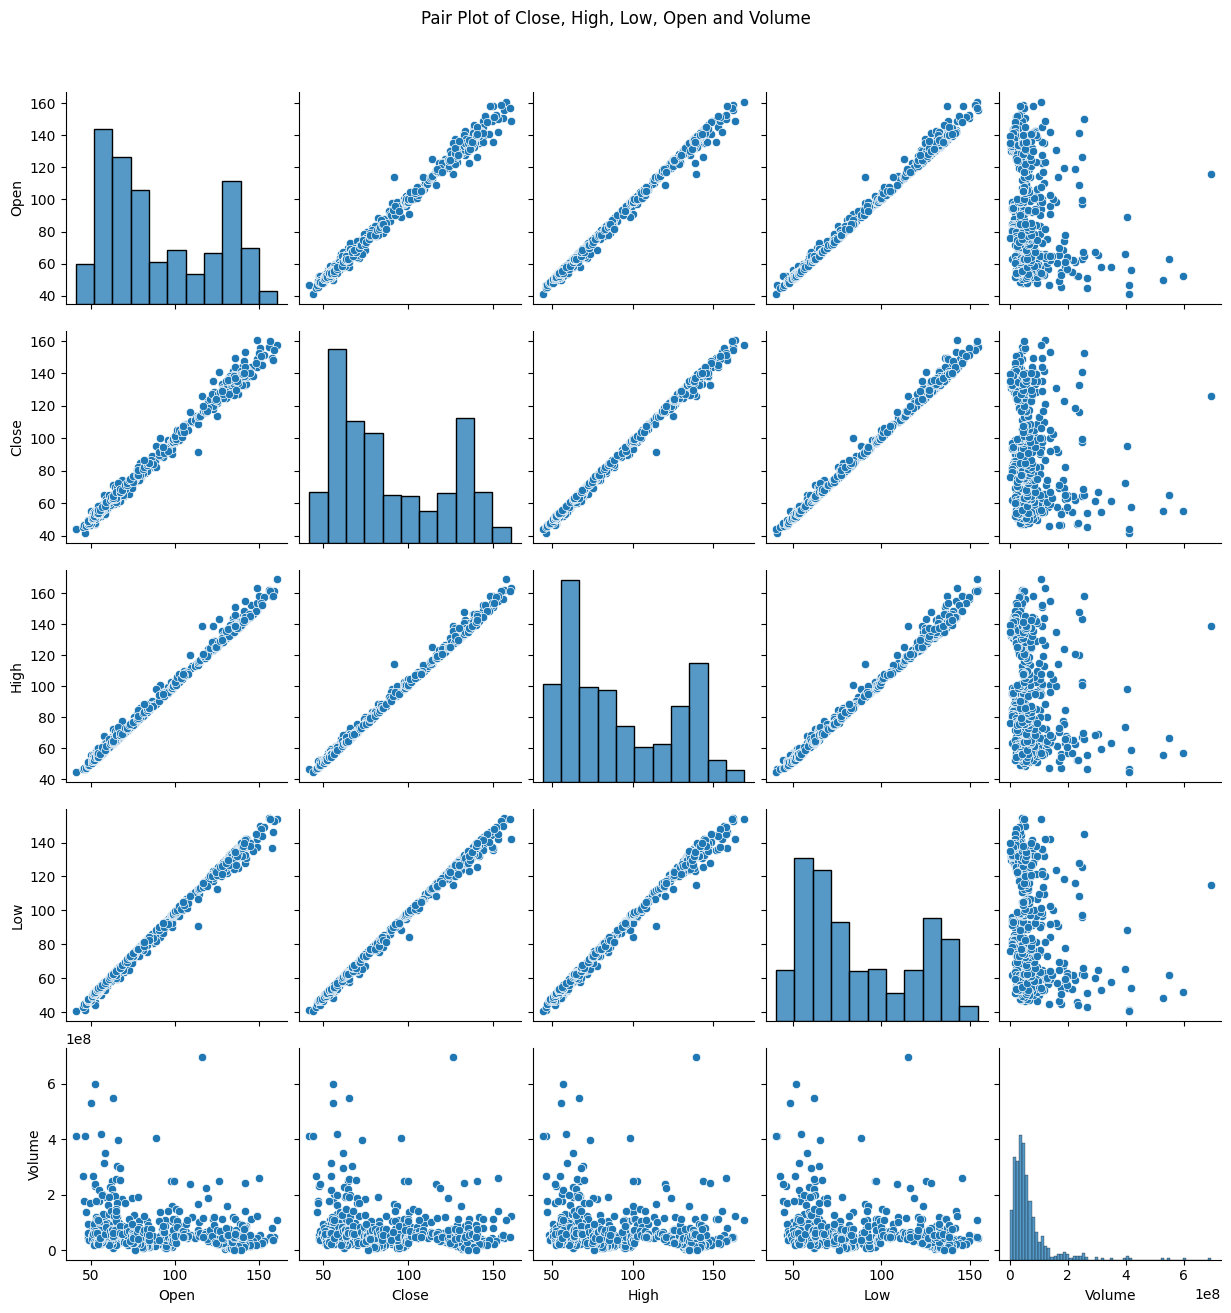

In [6]:
selected_data = zomato_df[['Open', 'Close', 'High', 'Low', 'Volume']]

sns.pairplot(selected_data)
plt.suptitle('Pair Plot of Close, High, Low, Open and Volume', y=1.05)
plt.show()

Let us do an experiment to see if we can find any trends or not.

- Plotting difference of close and open vs difference of High and low.
 - One can observe that there is positive trend here
- Plotting differene of close and high vs difference of open and low.
 - Whereas, we can see a weak positive trend.

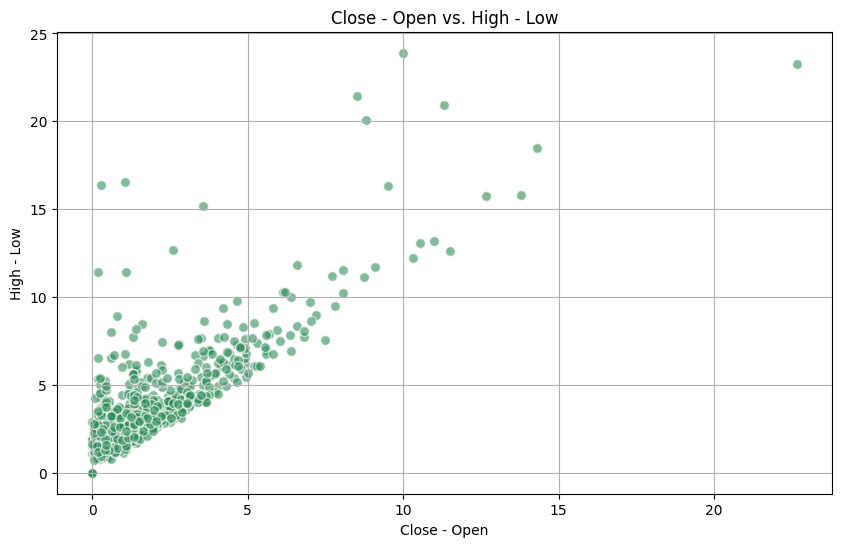

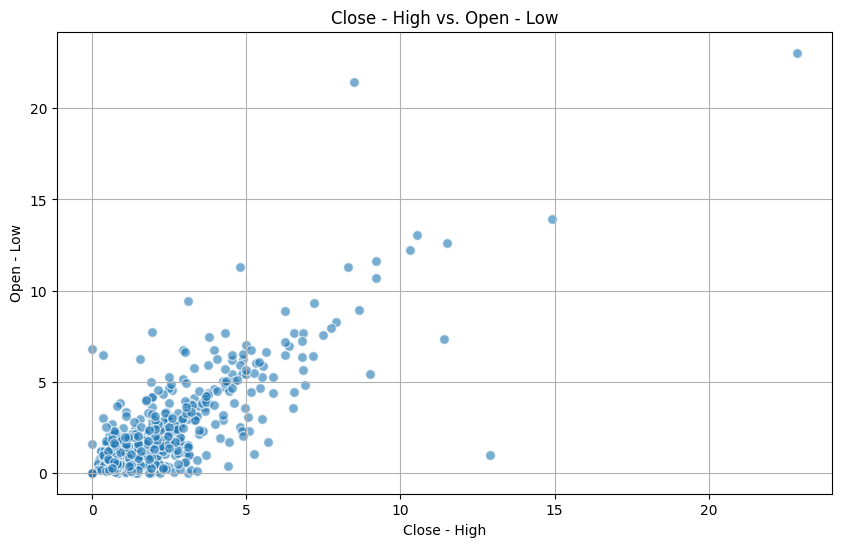

In [ ]:
difference_open_close = abs(zomato_df['Close'] - zomato_df['Open'])
difference_high_low = abs(zomato_df['High'] - zomato_df['Low'])
difference_open_low = abs(zomato_df['Open'] - zomato_df['Low'])
difference_close_high = abs(zomato_df['Close'] - zomato_df['High'])

plt.figure(figsize=(10, 6))
plt.scatter(difference_open_close, difference_high_low, alpha=0.6, edgecolors='w', s=50, color="seagreen")
plt.title('Close - Open vs. High - Low')
plt.xlabel('Close - Open')
plt.ylabel('High - Low')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(difference_close_high, difference_open_low, alpha=0.6, edgecolors='w', s=50, color="")
plt.title('Close - High vs. Open - Low')
plt.xlabel('Close - High')
plt.ylabel('Open - Low')
plt.grid(True)
plt.show()

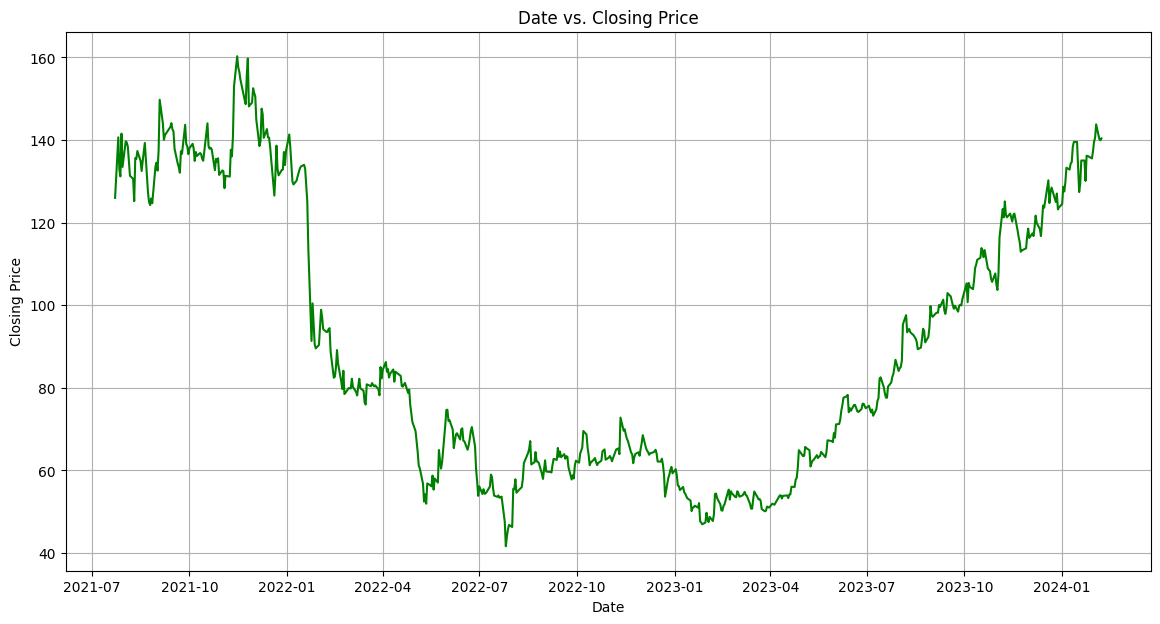

In [12]:
# Line plot for Date vs. Closing Price
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(zomato_df['Date']), zomato_df['Close'], label='Close Price', linestyle='-', color='g')
plt.title('Date vs. Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

**Conclusion**
- From the graphs and plots we can certainly say that the vairables ahve a positive relationship with each other.
- Also the trend of stock value fell from 160 to 50 in the beginning however it is rising up again, giving assurance that this is a good stock to invest in.

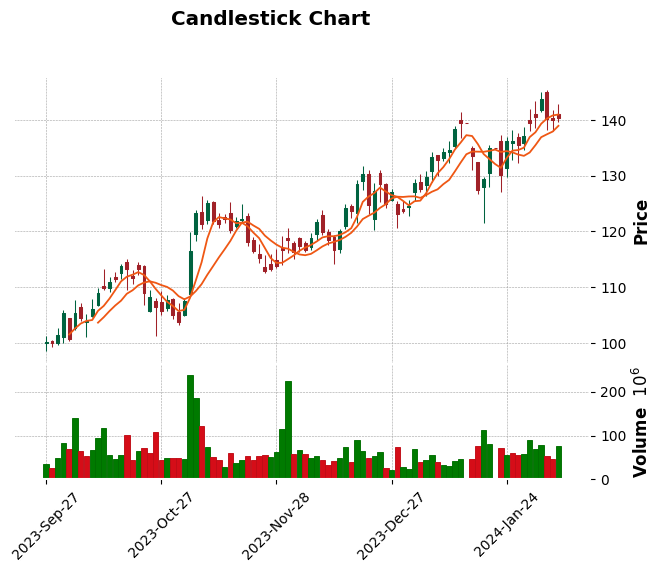

In [31]:
import mplfinance as mpf
zomato_df['Date'] = pd.to_datetime(zomato_df['Date'])
candleplot_df = zomato_df[len(zomato_df) - 90:]

candleplot_df.set_index('Date', inplace=True)


mpf.plot(candleplot_df, type='candle', style= "charles",
         title='Candlestick Chart',
         ylabel='Price',
         volume=True,
         mav=(5, 10))

### **Time Series Modelling & Forecasting**

**Steps**
1. Exctract data from dataset to be trained.
1. split data in train and test data. (80% train - 20% test)
1. Decide p,d,q using pacf and acf graphs for `High, Low, Open and Close`
1. Build ARIMA model using those parameters.
1. Exvaluate model
1. Forecast future values and compare.


Extracting data

In [5]:
# Extracting data
high = zomato_df['High']
low = zomato_df['Low']
open = zomato_df['Open']
close = zomato_df['Close']
volume = zomato_df[zomato_df['Volume'] > 0]['Volume']

# Splitting index
splitting_index = int(len(zomato_df) * 0.8)

# training data
high_train = high[:splitting_index]
low_train = low[:splitting_index]
open_train = open[:splitting_index]
close_train = close[:splitting_index]
volume_train = volume[:splitting_index]

# testing data
high_test = high[splitting_index:]
low_test = low[splitting_index:]
open_test = open[splitting_index:]
close_test = close[splitting_index:]
volume_test = volume[splitting_index:]

As Volume Seems to be stationary Lets test its Stationarity with KPSS test.
Null Hypothesis: the series is stationary.

In [6]:
from statsmodels.tsa.stattools import adfuller, kpss

def kpss_test(series, regression='c'):
    result = kpss(series, regression=regression, nlags="auto")
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[3].items():
        print('Critical Values:')
        print(f'   {key}, {value}')

# Perform the KPSS test
print("KPSS Test Result:")
kpss_test(volume_train)


KPSS Test Result:
KPSS Statistic: 0.437219
p-value: 0.061112
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739


Concluding that Series has some level of non stationarity at 10% significance level. Hence, to be safe we aree going to difference the volume time series.

Stationarize series with difference 1 and plotting it to see if we need to increase the value.

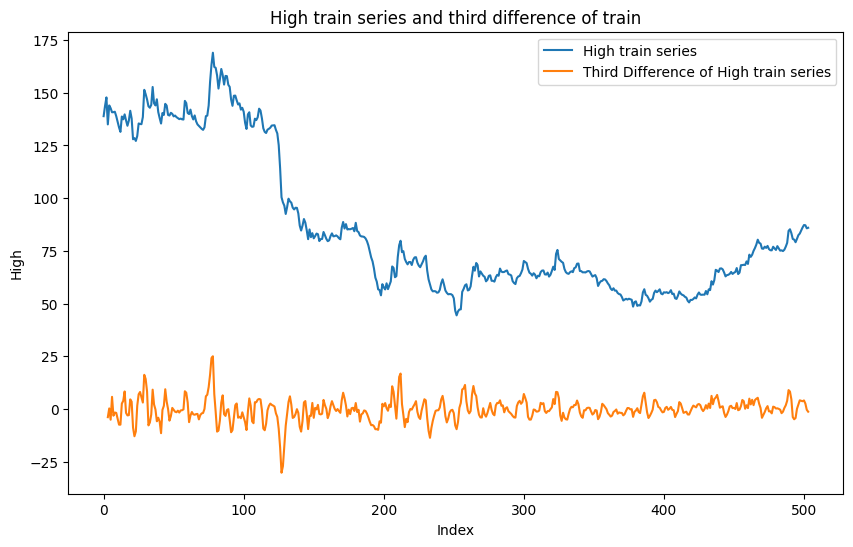

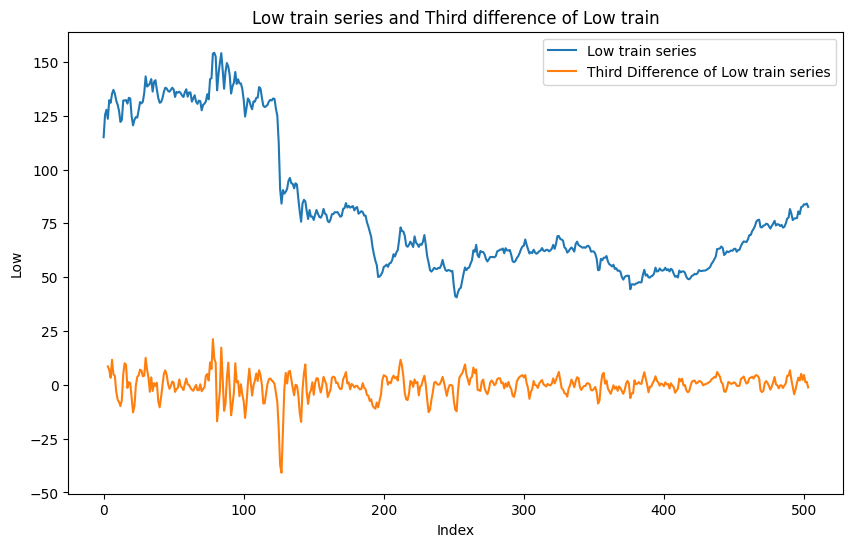

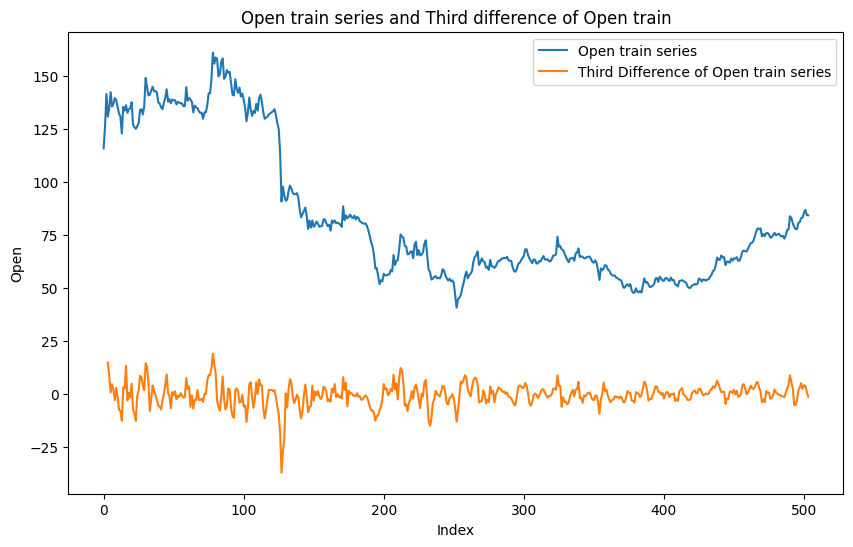

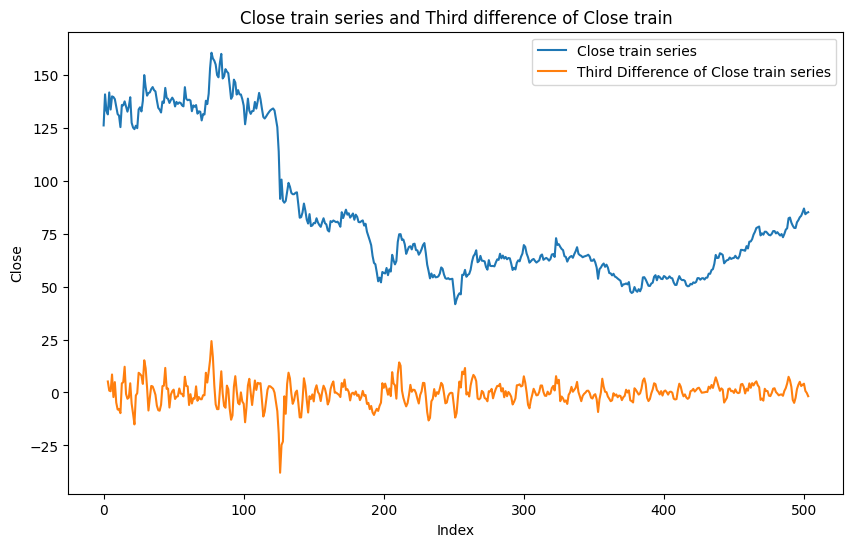

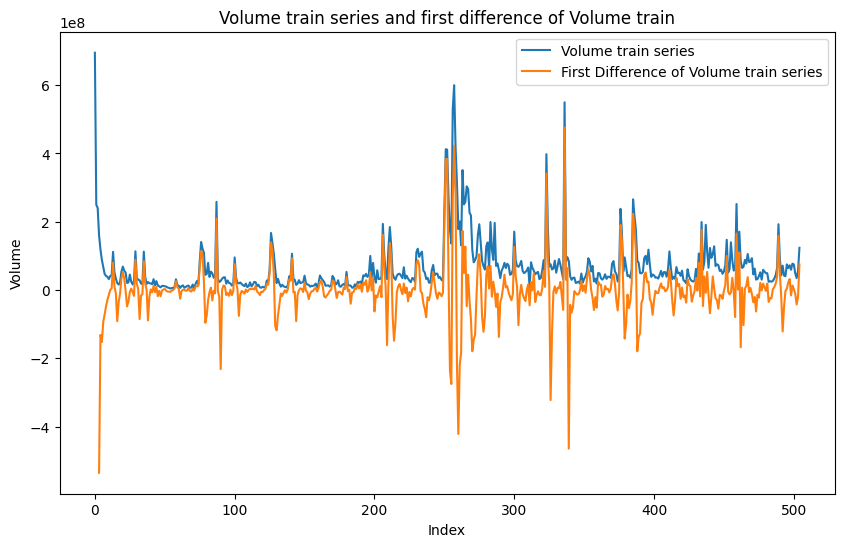

In [6]:
high_train_diff = high_train.diff(3).dropna()
low_train_diff = low_train.diff(3).dropna()
open_train_diff = open_train.diff(3).dropna()
close_train_diff = close_train.diff(3).dropna()
volume_train_diff = volume_train.diff(3).dropna()

# High
plt.figure(figsize=(10, 6))
plt.plot( high_train , label = "High train series")
plt.plot(high_train_diff , label = "Third Difference of High train series")
plt.xlabel('Index')
plt.ylabel('High')
plt.title('High train series and third difference of train')
plt.legend()

plt.show()

# Low
plt.figure(figsize=(10, 6))
plt.plot( low_train , label = "Low train series")
plt.plot(low_train_diff , label = "Third Difference of Low train series")
plt.xlabel('Index')
plt.ylabel('Low')
plt.title('Low train series and Third difference of Low train')
plt.legend()

plt.show()

# Open
plt.figure(figsize=(10, 6))
plt.plot( open_train , label = "Open train series")
plt.plot(open_train_diff , label = "Third Difference of Open train series")
plt.xlabel('Index')
plt.ylabel('Open')
plt.title('Open train series and Third difference of Open train')
plt.legend()

plt.show()

# Close
plt.figure(figsize=(10, 6))
plt.plot( close_train , label = "Close train series")
plt.plot(close_train_diff , label = "Third Difference of Close train series")
plt.xlabel('Index')
plt.ylabel('Close')
plt.title('Close train series and Third difference of Close train')
plt.legend()

plt.show()

# Volume
plt.figure(figsize=(10, 6))
plt.plot( volume_train , label = "Volume train series")
plt.plot(volume_train_diff , label = "First Difference of Volume train series")
plt.xlabel('Index')
plt.ylabel('Volume')
plt.title('Volume train series and first difference of Volume train')
plt.legend()

plt.show()

The series seems stationary after applying 1st differencing.
Hence d = 1

Now for the identifying p and q lets plot acf and pacf graphs.

ACF graphs for `High, Low, Close, Open and Volume`

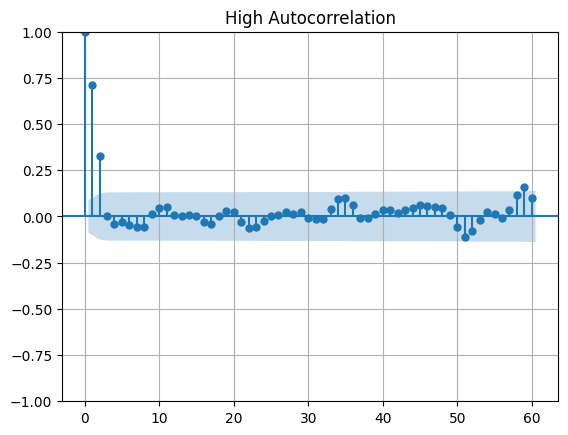

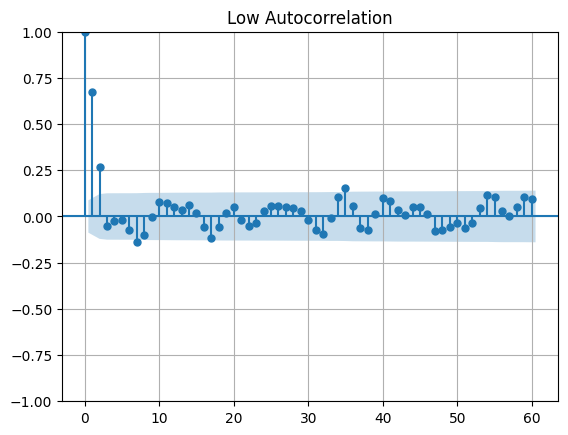

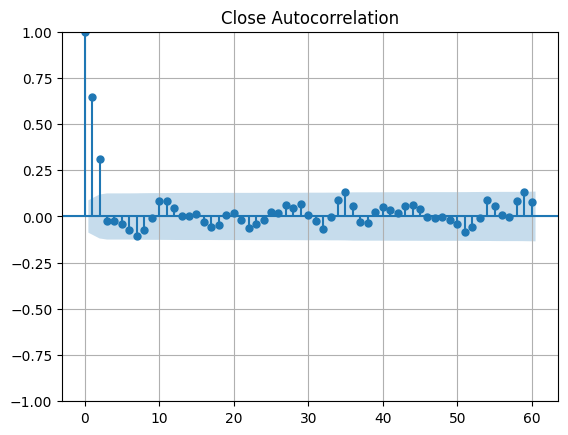

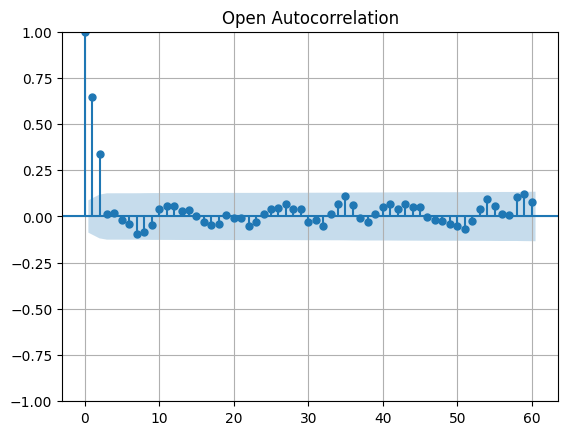

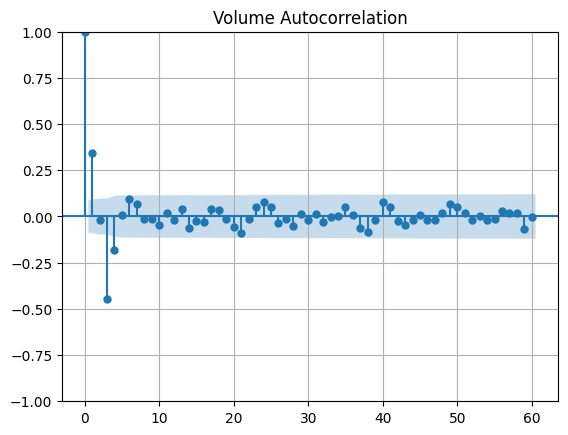

In [17]:
plot_acf(high_train_diff, lags = 60, title = "High Autocorrelation")
plt.grid(True)
plt.show()

plot_acf(low_train_diff, lags = 60, title = "Low Autocorrelation")
plt.grid(True)
plt.show()

plot_acf(close_train_diff, lags = 60, title = "Close Autocorrelation")
plt.grid(True)
plt.show()

plot_acf(open_train_diff, lags = 60, title = "Open Autocorrelation")
plt.grid(True)
plt.show()

plot_acf(volume_train_diff, lags = 60, title = "Volume Autocorrelation")
plt.grid(True)
plt.show()

plotting pacf

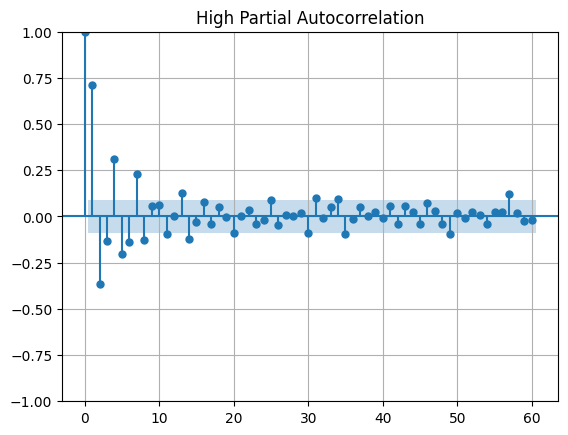

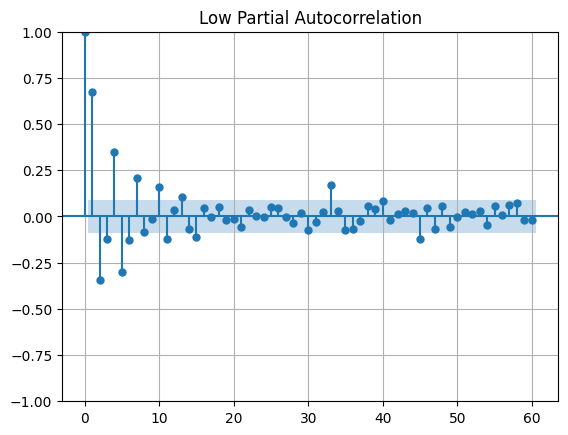

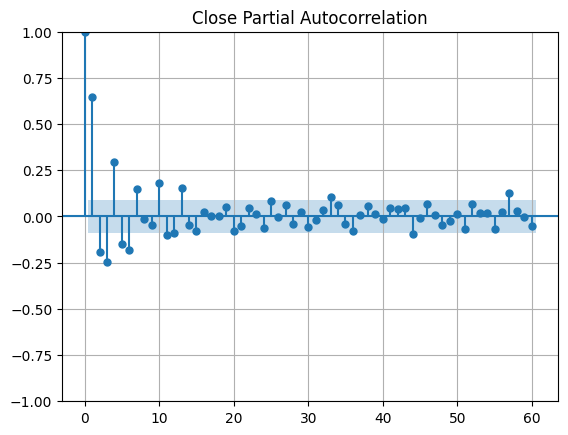

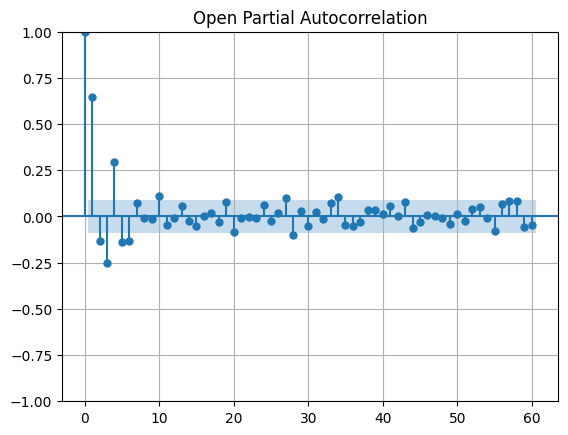

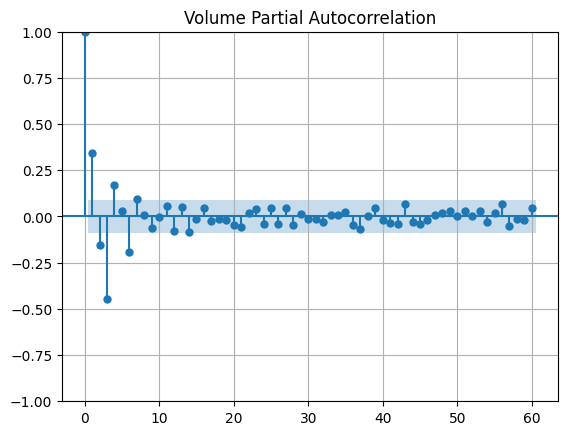

In [19]:
plot_pacf(high_train_diff, lags = 60, title = "High Partial Autocorrelation")
plt.grid(True)
plt.show()

plot_pacf(low_train_diff, lags = 60, title = "Low Partial Autocorrelation")
plt.grid(True)
plt.show()

plot_pacf(close_train_diff, lags = 60, title = "Close Partial Autocorrelation")
plt.grid(True)
plt.show()

plot_pacf(open_train_diff, lags = 60, title = "Open Partial Autocorrelation")
plt.grid(True)
plt.show()

plot_pacf(volume_train_diff, lags = 60, title = "Volume Partial Autocorrelation")
plt.grid(True)
plt.show()

Hence. Observing the graphs values to be used of `High, Open , Close, Low` are:
$\mathrm{p} = 2$,
$\mathrm{d} = 3$,
$\mathrm{q} = 3$
and for `Volume`:
$\mathrm{p} = 2$,
$\mathrm{d} = 3$,
$\mathrm{q} = 2$

In [7]:
# Building models
high_model = ARIMA(high_train, order=(2,3,3))
low_model = ARIMA(low_train, order=(2,3,3))
open_model = ARIMA(open_train, order=(2,3,3))
close_model = ARIMA(close_train, order=(2,3,3))
volume_model = ARIMA(volume_train, order=(2,3,2))

# Fitted models
high_model_fit = high_model.fit()
low_model_fit = low_model.fit()
open_model_fit = open_model.fit()
close_model_fit = close_model.fit()
volume_model_fit = volume_model.fit()

# Model Summary
print("High Model Summary")
print(high_model_fit.summary())

print("Low Model Summary")
print(low_model_fit.summary())

print("Open Model Summary")
print(open_model_fit.summary())

print("Close Model Summary")
print(close_model_fit.summary())

print("Volume Model Summary")
print(volume_model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as startin

High Model Summary
                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                  504
Model:                 ARIMA(2, 3, 3)   Log Likelihood               -1229.640
Date:                Thu, 20 Jun 2024   AIC                           2471.280
Time:                        00:24:43   BIC                           2496.579
Sample:                             0   HQIC                          2481.206
                                - 504                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8443      0.031    -27.064      0.000      -0.905      -0.783
ar.L2          0.1063      0.031      3.394      0.001       0.045       0.168
ma.L1         -0.9962      2.019 

Evaluating models using Walk Forward Validation

In [8]:
# walk-forward validation function
def walk_forward_validation(train_data, test_data, order):
    predictions = []
    train_data_array = train_data.to_numpy()
    test_data_array = test_data.to_numpy()

    for i in range(len(test_data)):

        model = ARIMA(train_data_array, order=order)
        model_fit = model.fit()

        output = model_fit.forecast(steps=1)  # Forecast the next point and store in prediction.

        prediction = output[0]

        # Update the training data with the new point
        predictions.append(prediction)

        # Update the training data with the new point
        train_data_array = train_data_array.tolist()
        train_data_array.append(test_data_array[i])
        train_data_array = np.array(train_data_array)

    return np.array(predictions)


# Predicting Prices for Close, Open , High , Low
close_predictions = walk_forward_validation(close_train, close_test, (2,3,3))

open_predictions = walk_forward_validation(open_train, open_test, (2,3,3))

high_predictions = walk_forward_validation(high_train, high_test, (2,3,3))

low_predictions = walk_forward_validation(low_train, low_test, (2,3,3))

#volume_predictions = walk_forward_validation(volume_train, volume_test, (2,3,2))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Like

In [9]:
volume_predictions = walk_forward_validation(volume_train, volume_test, (2,3,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Evaluating using
1. Root Mean Squared Error (RMSE)
1. Mean Absolute Percentage Error (MAPE).

In [13]:
close_rmse = np.sqrt(mean_squared_error(close_test.to_numpy(), close_predictions))
open_rmse = np.sqrt(mean_squared_error(open_test.to_numpy(), open_predictions))
high_rmse = np.sqrt(mean_squared_error(high_test.to_numpy(), high_predictions))
low_rmse = np.sqrt(mean_squared_error(low_test.to_numpy(), low_predictions))
#volume_rmse = np.sqrt(mean_squared_error(volume_test.to_numpy(), volume_predictions))

close_mape = np.mean(np.abs((close_test.to_numpy() - close_predictions) / close_test.to_numpy())) * 100
open_mape = np.mean(np.abs((open_test.to_numpy() - open_predictions) / open_test.to_numpy())) * 100
high_mape = np.mean(np.abs((high_test.to_numpy() - high_predictions) / high_test.to_numpy())) * 100
low_mape = np.mean(np.abs((low_test.to_numpy() - low_predictions) / low_test.to_numpy())) * 100
#volume_mape = np.mean(np.abs((volume_test.to_numpy() - volume_predictions) / volume_test.to_numpy())) * 100


print("Root Mean Square Error (RMSE)")
print("Close:", close_rmse)
print("Open:", open_rmse)
print("High:", high_rmse)
print("Low:", low_rmse)
#print("Volume:", volume_rmse)

print()
print("Mean Absolute Percentage Error (MAPE)")
print("Close:", close_mape)
print("Open:", open_mape)
print("High:", high_mape)
print("Low:", low_mape)
#print("Volume:", volume_mape)


Root Mean Square Error (RMSE)
Close: 2.76424234354872
Open: 2.9924231828910983
High: 2.601668117577611
Low: 2.8631309419023787

Mean Absolute Percentage Error (MAPE)
Close: 1.8754259071557533
Open: 1.981758919314519
High: 1.709890145731527
Low: 1.8060546726450608


Plotting Predictions and actual values.

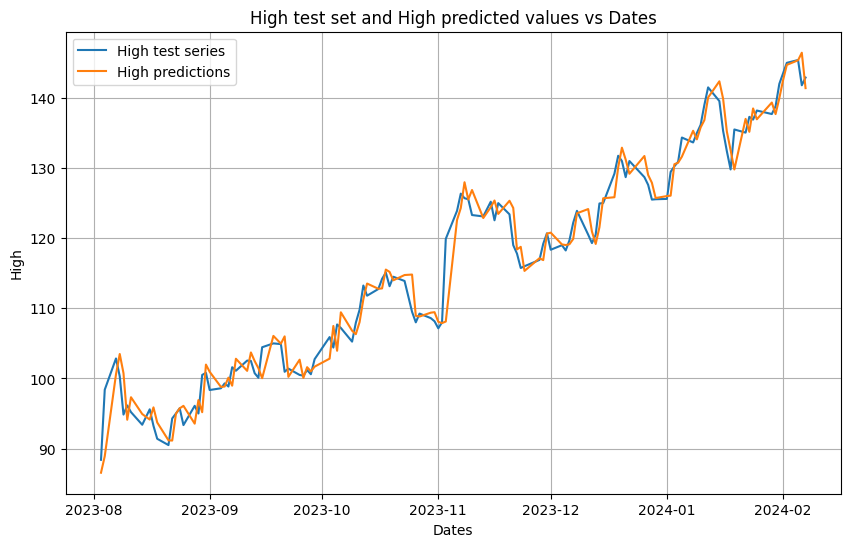

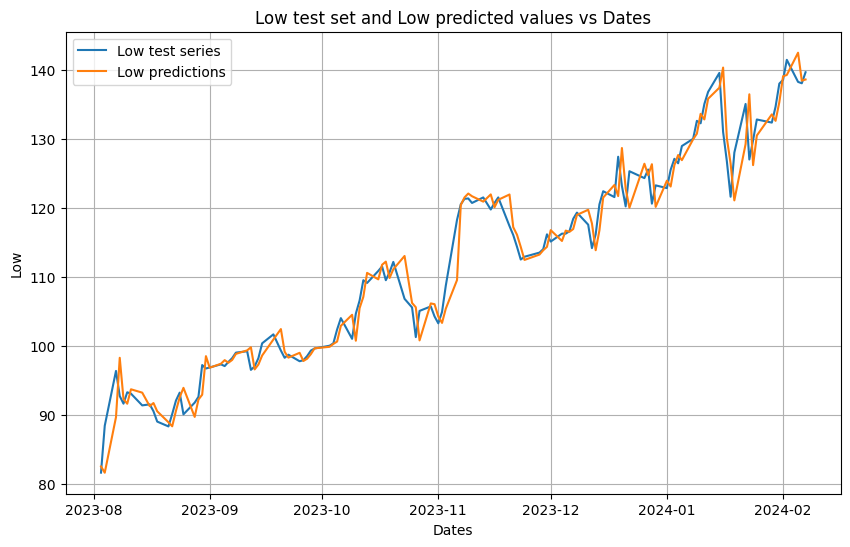

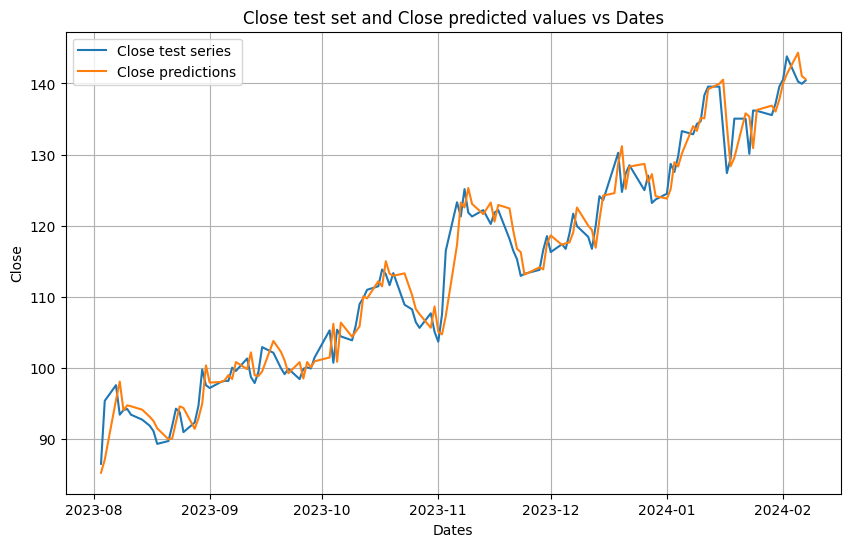

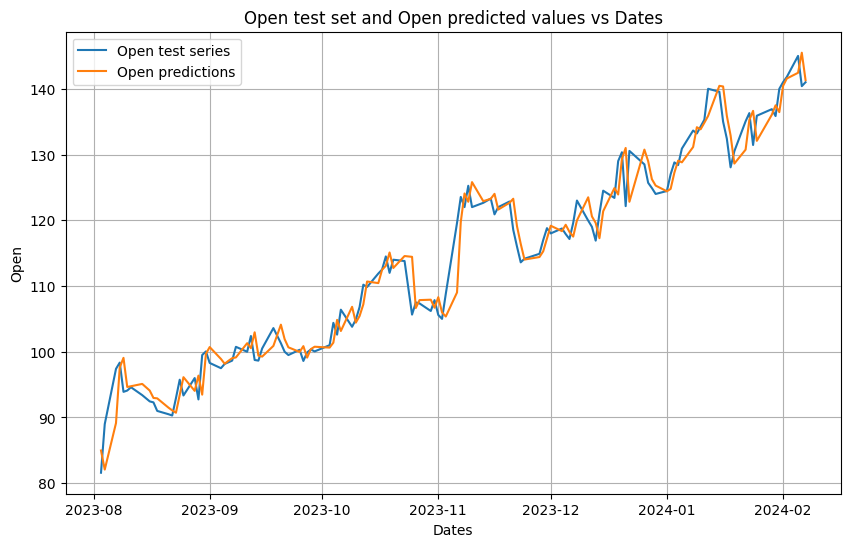

In [12]:
zomato_df['Date'] = pd.to_datetime(zomato_df['Date'])

plt.figure(figsize=(10, 6))
plt.plot(zomato_df["Date"][splitting_index:],high_test , label = "High test series")
plt.plot(zomato_df["Date"][splitting_index:], high_predictions , label = "High predictions")
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('High')
plt.title('High test set and High predicted values vs Dates')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(zomato_df["Date"][splitting_index:],low_test , label = "Low test series")
plt.plot(zomato_df["Date"][splitting_index:], low_predictions , label = "Low predictions")
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Low')
plt.title('Low test set and Low predicted values vs Dates')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(zomato_df["Date"][splitting_index:],close_test , label = "Close test series")
plt.plot(zomato_df["Date"][splitting_index:], close_predictions , label = "Close predictions")
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close')
plt.title('Close test set and Close predicted values vs Dates')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(zomato_df["Date"][splitting_index:],open_test , label = "Open test series")
plt.plot(zomato_df["Date"][splitting_index:], open_predictions , label = "Open predictions")
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.title('Open test set and Open predicted values vs Dates')
plt.legend()
plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(zomato_df["Date"][splitting_index:len(zomato_df["Date"]) - 3],volume_test , label = "Volume test series")
# plt.plot(zomato_df["Date"][splitting_index:len(zomato_df["Date"]) - 3], volume_predictions , label = "Volume predictions")
# plt.grid(True)
# plt.xlabel('Dates')
# plt.ylabel('Volume')
# plt.title('Volume test set and Volume predicted values vs Dates')
# plt.legend()
# plt.show()


Getting Forecast predictions and visualizations

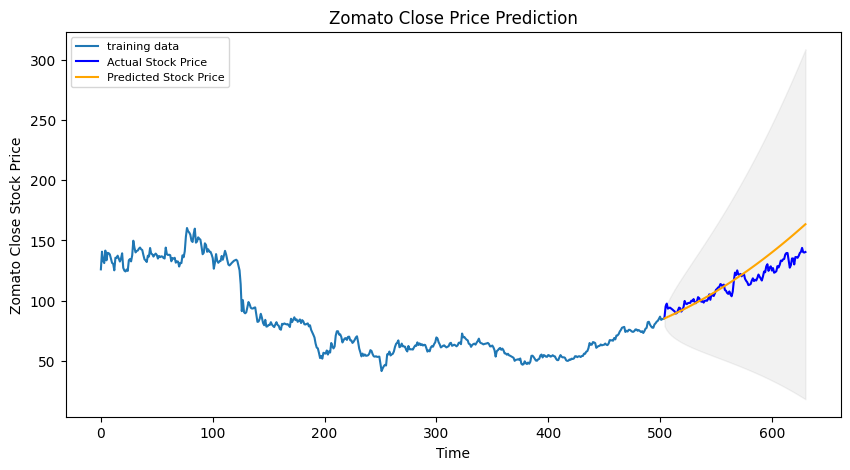

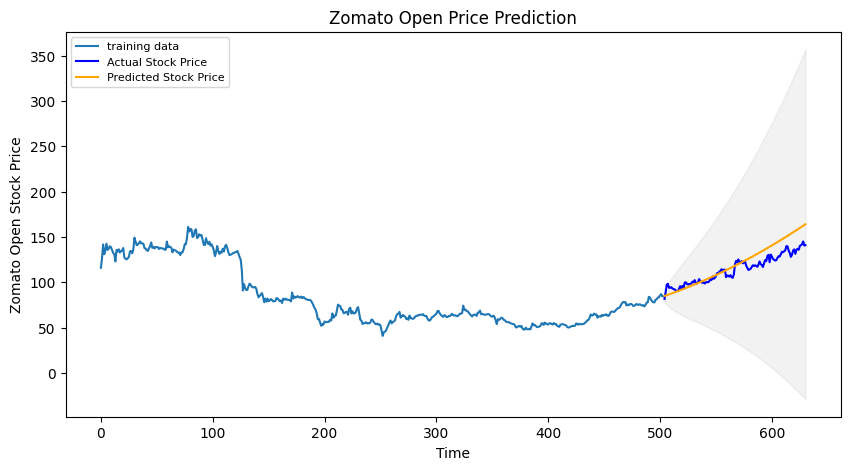

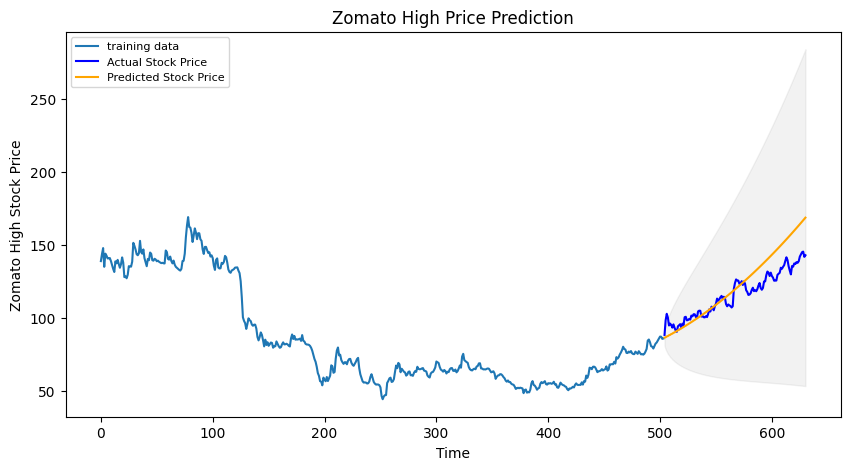

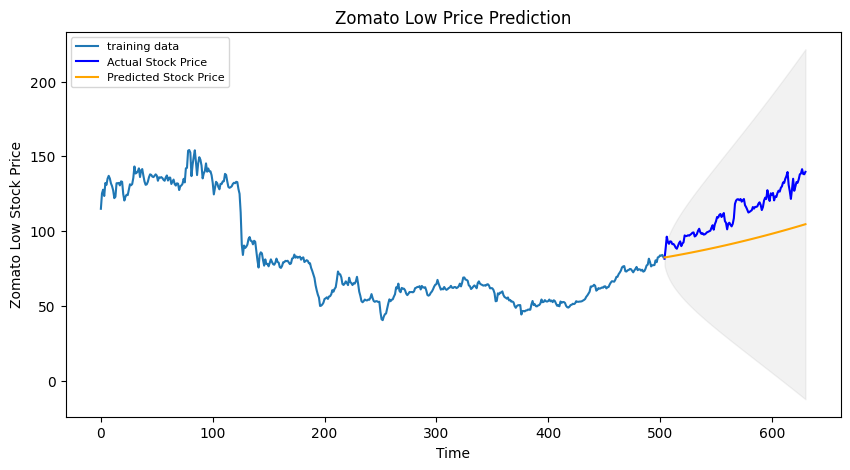

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


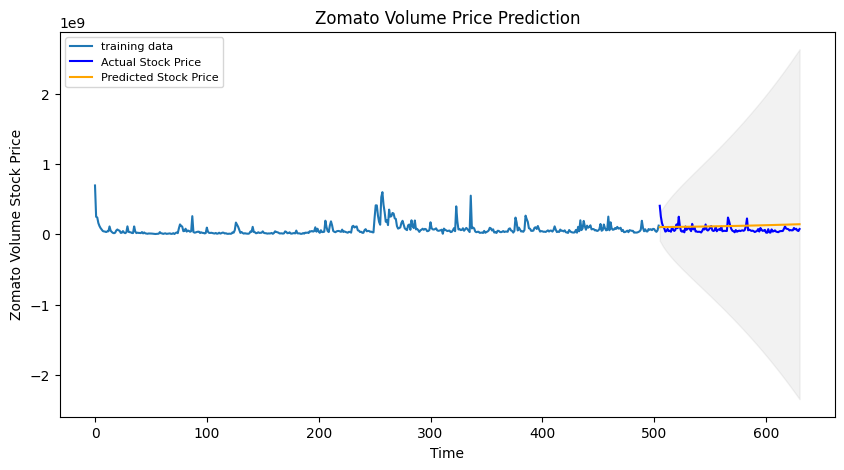

In [28]:
def plot_forecast(fitted_model, test_data, train_data, column_name):
  # Forecast
  fc = fitted_model.get_forecast(127)
  conf = fc.conf_int(alpha = 0.05) #95% confidence interval
  # Extract predicted values
  fc_series = pd.Series(fc.predicted_mean, index=test_data.index)
  # Make as pandas series
  lower_series = pd.Series(conf[f"lower {column_name}"], index=test_data.index)
  upper_series = pd.Series(conf[f"upper {column_name}"], index=test_data.index)

  # Plot
  plt.figure(figsize=(10,5), dpi=100)
  plt.plot(train_data, label='training data')
  plt.plot(test_data, color = 'blue', label='Actual Stock Price')
  plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
  plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.05)
  plt.title(f'Zomato {column_name} Price Prediction')
  plt.xlabel('Time')
  plt.ylabel(f'Zomato {column_name} Stock Price')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()

# train = zomato_df['Close'][:len(zomato_df) - 90]
# mod = ARIMA(train, order=(1,2,1))
# model_fit = mod.fit()
plot_forecast(close_model_fit, close_test, close_train, 'Close')
plot_forecast(open_model_fit, open_test, open_train, 'Open')
plot_forecast(high_model_fit, high_test, high_train, 'High')
plot_forecast(low_model_fit, low_test, low_train, 'Low')
plot_forecast(volume_model_fit, volume_test, volume_train, 'Volume')
